In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read in final dataset
data = pd.read_csv('output_data/cars_movies_master.csv')

In [3]:
# how many null values, in which columns?
data.isnull().sum()

Year                    0
Vehicle Original        0
Vehicle              1075
Sales                   0
% Change                0
Change                  0
Car                  1075
Stars                1075
Highest Star         1075
Strong Appearance    1075
Weak Appearance      1075
Total Appearance     1075
Release              1075
Rank                 1075
Best Rank            1075
Gross                1075
Distributor          1075
dtype: int64

In [4]:
# consider all NaN values in movie-related data to be value 0
data = data.fillna(0)
data

,Year,Vehicle Original,Vehicle,Sales,% Change,Change,Car,Stars,Highest Star,Strong Appearance,Weak Appearance,Total Appearance,Release,Rank,Best Rank,Gross,Distributor
0,2010,acura mdx,acura mdx,47210,0.514209,Positive,2007 acura mdx,1.0,1.0,0.0,2.0,2.0,The Other Guys,18.0,18.0,"$119,219,978",Sony Pictures Entertainment (SPE)
1,2010,acura rdx,0,14975,0.474934,Positive,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2,2010,acura rl,0,2037,-0.002937,Negative,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
3,2010,acura tl,acura tl,34049,0.012760,Positive,1999 acura tl,1.0,1.0,0.0,3.0,3.0,The Other Guys,18.0,18.0,"$119,219,978",Sony Pictures Entertainment (SPE)
4,2010,acura tsx,acura tsx,32076,0.119581,Positive,2009 acura tsx,1.0,1.0,0.0,1.0,1.0,Jackass 3D,21.0,21.0,"$117,052,883",Paramount Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2020,volvo s60/v60,volvo s60,16828,-0.166518,Negative,2007 volvo s60,2.0,2.0,0.0,4.0,4.0,Vanguard,99.0,99.0,"$793,525",Gravitas Ventures
3052,2020,volvo s90/v90,0,3194,-0.211747,Negative,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
3053,2020,volvo xc40,volvo xc40,23778,0.347424,Positive,2019 volvo xc40,1.0,1.0,0.0,1.0,1.0,Fatale,68.0,68.0,"$2,388,133",Lionsgate
3054,2020,volvo xc60,volvo xc60,32078,0.049055,Positive,2014 volvo xc60,2.0,2.0,0.0,1.0,1.0,Bombshell,34.0,34.0,"$13,644,923",Lionsgate


In [5]:
# sample dataset for a specific vehicle
data_mustang = data.loc[data['Vehicle Original'] == 'ford mustang']
data_mustang

,Year,Vehicle Original,Vehicle,Sales,% Change,Change,Car,Stars,Highest Star,Strong Appearance,Weak Appearance,Total Appearance,Release,Rank,Best Rank,Gross,Distributor
74,2010,ford mustang,ford mustang,73716,0.106465,Positive,2009 ford mustang,3.0,3.0,1.0,14.0,15.0,Kick-Ass,70.0,70.0,"$48,071,303",Lionsgate
348,2011,ford mustang,ford mustang,70438,-0.044468,Negative,1991 ford mustang,4.0,4.0,3.0,15.0,18.0,30 Minutes or Less,91.0,91.0,"$37,053,924",Sony Pictures Entertainment (SPE)
611,2012,ford mustang,ford mustang,82995,0.178270,Positive,1991 ford mustang,3.0,3.0,4.0,23.0,27.0,21 Jump Street,18.0,18.0,"$138,447,667",Sony Pictures Entertainment (SPE)
881,2013,ford mustang,ford mustang,77186,-0.069992,Negative,1969 ford mustang,3.0,3.0,1.0,18.0,19.0,Fast & Furious 6,8.0,8.0,"$238,679,850",Universal Pictures
1150,2014,ford mustang,ford mustang,82635,0.070596,Positive,2014 ford mustang,5.0,5.0,2.0,15.0,17.0,Need for Speed,76.0,76.0,"$43,577,636",Walt Disney Studios Motion Pictures
1429,2015,ford mustang,ford mustang,122349,0.480595,Positive,1967 ford mustang,3.0,3.0,4.0,15.0,19.0,Creed,28.0,28.0,"$99,385,165",Warner Bros.
1711,2016,ford mustang,ford mustang,105932,-0.134182,Negative,2015 ford mustang,3.0,3.0,2.0,14.0,16.0,Daddy's Home,36.0,36.0,"$85,672,859",Paramount Pictures
2012,2017,ford mustang,ford mustang,81866,-0.227183,Negative,2015 ford mustang,4.0,4.0,4.0,17.0,21.0,Transformers: The Last Knight,24.0,24.0,"$130,168,683",Paramount Pictures
2300,2018,ford mustang,ford mustang,75842,-0.073584,Negative,1967 ford mustang,3.0,3.0,2.0,3.0,5.0,Creed II,28.0,28.0,"$112,448,520",Metro-Goldwyn-Mayer (MGM)
2579,2019,ford mustang,ford mustang,72489,-0.044210,Negative,2018 ford mustang,3.0,3.0,1.0,20.0,21.0,It Chapter Two,10.0,10.0,"$211,593,228",Warner Bros.


In [6]:
# create dataframe for extracting correlation coefficient r
df_r = data_mustang[['Sales', '% Change', 'Highest Star', 'Strong Appearance', 'Weak Appearance', 'Total Appearance']]

# rename columns
df_r.columns = ['Sales', '% Change', 'Plot Relevance', 'High Plot', 'Low Plot', 'Total Appearance']
df_r

,Sales,% Change,Plot Relevance,High Plot,Low Plot,Total Appearance
74,73716,0.106465,3.0,1.0,14.0,15.0
348,70438,-0.044468,4.0,3.0,15.0,18.0
611,82995,0.178270,3.0,4.0,23.0,27.0
881,77186,-0.069992,3.0,1.0,18.0,19.0
1150,82635,0.070596,5.0,2.0,15.0,17.0
1429,122349,0.480595,3.0,4.0,15.0,19.0
1711,105932,-0.134182,3.0,2.0,14.0,16.0
2012,81866,-0.227183,4.0,4.0,17.0,21.0
2300,75842,-0.073584,3.0,2.0,3.0,5.0
2579,72489,-0.044210,3.0,1.0,20.0,21.0


In [7]:
# calculate correlation coefficient for sales or change and the four other features
sales_r_plot = st.pearsonr(df_r.Sales, df_r['Plot Relevance'])
sales_r_high = st.pearsonr(df_r.Sales, df_r['High Plot'])
sales_r_low = st.pearsonr(df_r.Sales, df_r['Low Plot'])
sales_r_total = st.pearsonr(df_r.Sales, df_r['Total Appearance'])
print(sales_r_plot[0])
print(sales_r_high[0])
print(sales_r_low[0])
print(sales_r_total[0])

-0.10356263728242607
0.5142356615013631
-0.13854918622446522
-0.01320633312278646


In [8]:
change_r_plot = st.pearsonr(df_r['% Change'], df_r['Plot Relevance'])
change_r_high = st.pearsonr(df_r['% Change'], df_r['High Plot'])
change_r_low = st.pearsonr(df_r['% Change'], df_r['Low Plot'])
change_r_total = st.pearsonr(df_r['% Change'], df_r['Total Appearance'])
print(change_r_plot[0])
print(change_r_high[0])
print(change_r_low[0])
print(change_r_total[0])

-0.12168258602145221
0.38389420244000483
0.041752129778634905
0.1292052188431993


In [9]:
# correlation table
df_corr = df_r.corr()
df_corr

,Sales,% Change,Plot Relevance,High Plot,Low Plot,Total Appearance
Sales,1.000000,0.603347,-0.103563,0.514236,-0.138549,-0.013206
% Change,0.603347,1.000000,-0.121683,0.383894,0.041752,0.129205
Plot Relevance,-0.103563,-0.121683,1.000000,0.222600,-0.046291,0.007390
High Plot,0.514236,0.383894,0.222600,1.000000,0.064061,0.293751
Low Plot,-0.138549,0.041752,-0.046291,0.064061,1.000000,0.972737
Total Appearance,-0.013206,0.129205,0.007390,0.293751,0.972737,1.000000


In [10]:
df_corr.iloc[0, 3]

0.5142356615013632

In [11]:
# for a given vehicle's correlation table, search and display any moderate strength correlation coefficient values (>5)
for x in range(2):
    for y in range(2, 6):
        if df_corr.iloc[x, y] > 0:
            if df_corr.iloc[x, y] >= 0.5:
                print(f'{df_corr.index[x]} and {df_corr.columns[y]}')
                print(df_corr.iloc[x, y])
        elif df_corr.iloc[x, y] < 0:
            if df_corr.iloc[x, y] <= (-0.5):
                print(f'{df_corr.index[x]} and {df_corr.columns[y]}')
                print(df_corr.iloc[x, y])

Sales and High Plot
0.5142356615013632


In [12]:
# create list of unique vehicles from the master dataset
vehicles = data['Vehicle Original'].unique().tolist()

In [13]:
# iterate through list of vehicles and return absolute value of r >= 0.5 or <= -0.5
# due to the large number of small sample sizes (n<4), exclude cars except for those with 8 or more years of data)
counter = 1
garage = [] # list of cars n>=8, with significant r value
no_garage = [] # list of cars n<8, cannot assess reliably
corr_list = [] # list of signifcant correlation coefficient

for vehicle in vehicles:
    data_car = data.loc[data['Vehicle Original'] == vehicle]
    if len(data_car) >= 8:
        df_r = data_car[['Sales', '% Change', 'Highest Star', 'Strong Appearance', 'Weak Appearance', 'Total Appearance']]
        df_r.columns = ['Sales', '% Change', 'Star Rank', 'Strong Appearance', 'Weak Appearance', 'Total Appearance']
        df_corr = df_r.corr()
        for x in range(2):
            for y in range(2, 6):
                if df_corr.iloc[x, y] >= 0:
                    if df_corr.iloc[x, y] >= 0.5:
                        garage.append(vehicle)
                        print(f'{counter}. {vehicle}:')
                        print(f'{df_corr.index[x]} and {df_corr.columns[y]}: {df_corr.iloc[x, y]}')
                        print('-'*13)
                        corr_list.append(df_corr.iloc[x, y])
                        counter += 1
                elif df_corr.iloc[x, y] < 0:
                    if df_corr.iloc[x, y] <= (-0.5):
                        garage.append(vehicle)
                        print(f'{counter}. {vehicle}:')
                        print(f'{df_corr.index[x]} and {df_corr.columns[y]}: {df_corr.iloc[x, y]}')
                        print('-'*13)
                        corr_list.append(df_corr.iloc[x, y])
                        counter += 1
    else:
        no_garage.append(vehicle)

1. acura rdx:
Sales and Star Rank: 0.5366989330499468
-------------
2. audi a3:
Sales and Weak Appearance: 0.542422159210984
-------------
3. audi a3:
Sales and Total Appearance: 0.5156112294882785
-------------
4. audi a6:
Sales and Total Appearance: 0.5492933762401709
-------------
5. audi q5:
Sales and Star Rank: 0.7676581054323632
-------------
6. audi q5:
% Change and Star Rank: -0.58351709686353
-------------
7. audi q5:
% Change and Weak Appearance: -0.765569002745809
-------------
8. audi q5:
% Change and Total Appearance: -0.765569002745809
-------------
9. audi q7:
Sales and Star Rank: 0.7253971256754704
-------------
10. audi q7:
Sales and Strong Appearance: 0.5236826666387051
-------------
11. audi r8:
% Change and Total Appearance: -0.523620771396298
-------------
12. audi tt:
Sales and Weak Appearance: 0.6863719284863751
-------------
13. audi tt:
Sales and Total Appearance: 0.6921688173408616
-------------
14. bmw 6-series:
Sales and Star Rank: 0.6205814953133176
-------

117. subaru legacy:
Sales and Star Rank: 0.6805742066560974
-------------
118. subaru legacy:
Sales and Strong Appearance: 0.642910229332041
-------------
119. toyota 4runner:
Sales and Star Rank: 0.5675983191332874
-------------
120. toyota 4runner:
Sales and Strong Appearance: 0.5084324916552599
-------------
121. toyota avalon:
% Change and Star Rank: -0.6448904130728629
-------------
122. toyota rav4:
Sales and Strong Appearance: -0.6397188091461029
-------------
123. toyota rav4:
% Change and Star Rank: -0.6848426576256478
-------------
124. toyota tacoma:
Sales and Star Rank: 0.671785115918832
-------------
125. toyota venza:
Sales and Weak Appearance: -0.5942680307126897
-------------
126. toyota venza:
Sales and Total Appearance: -0.5942680307126897
-------------
127. volkswagen golf/gti/r/sportwagen alltrack:
Sales and Star Rank: 0.5418555106025978
-------------
128. volkswagen golf/gti/r/sportwagen alltrack:
Sales and Weak Appearance: 0.565520353327834
-------------
129. volk

In [14]:
# create unique list of cars for each list above
unique_garage = []
for car in garage:
    if car not in unique_garage:
        unique_garage.append(car)
        
unique_no_garage = []
for car in no_garage:
    if car not in unique_no_garage:
        unique_no_garage.append(car)

unique_trunk = []
for car in vehicles:
    if car not in unique_garage and car not in unique_no_garage:
        unique_trunk.append(car)

In [15]:
print(f'{len(unique_garage) + len(unique_trunk)} cars have sample size n>=8, out of {len(vehicles)} cars total.')
print(f'{len(unique_no_garage)} cars have a sample size too small to evaluate (n<8).')
print(f'{len(unique_garage)} cars have significant r value >0.5 or <-0.5, while {len(unique_trunk)} have no significant correlation')

206 cars have sample size n>=8, out of 446 cars total.
240 cars have a sample size too small to evaluate (n<8).
76 cars have significant r value >0.5 or <-0.5, while 130 have no significant correlation


In [16]:
corr_df = pd.DataFrame({'correlation coefficient':corr_list})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000133FFB87E20>]],
      dtype=object)

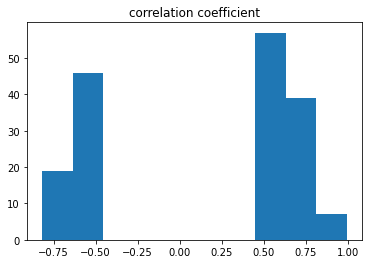

In [17]:
corr_df.hist(grid=False)

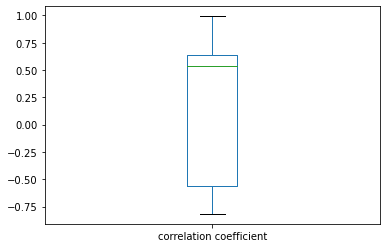

In [18]:
corr_df.plot(kind="box")